In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actigraph = pd.read_csv('project_tables/actigraph/000000_0', names = ['username', 'total_steps', 'avg_heart_rate'])
activity = pd.read_csv('project_tables/activity/000000_0', names = ['username', 'type', 'time'])
rr = pd.read_csv('project_tables/rr/000000_0', names = ['username', 'ibi_s'])
info = pd.read_csv('project_tables/info/000000_0', names = ['username', 'gender', 'weight', 'height', 'age'])
sleep = pd.read_csv('project_tables/sleep/000000_0', names = ['username', 'latency', 'efficiency', 'total_minutes_in_bed', 'total_sleep_time', 'wake_after_sleep_onset', 'num_awakening', 'avg_awakening_length', 'movement_index', 'fragmentation_index', 'sleep_fragmentation_index'])
questionnaire = pd.read_csv('project_tables/questionnaire/000000_0', names = ['username', 'meq', 'stai1', 'stai2', 'pittsburgh', 'daily_stress', 'bisbas_bis', 'bisbas_reward', 'bisbas_drive', 'bisbas_fun', 'panas_pos_10', 'panas_pos_14', 'panas_pos_18', 'panas_pos_22', 'panas_pos_9p1', 'panas_neg_10', 'panas_neg_14', 'panas_neg_18', 'panas_neg_22', 'panas_neg_9p1'])

In [3]:
info.drop(columns = ['gender'], inplace = True)

In [4]:
# got np.zeros from https://stackoverflow.com/questions/22963263/creating-a-zero-filled-pandas-data-frame
activity_sum = pd.DataFrame(np.zeros((19, 13)))
activity_sum.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
activity_sum.index = actigraph['username']

In [5]:
for index, row in activity.iterrows():
    activity_sum.at[int(row['username']), str(int(row['type']))] = row['time']
# got reset_index from https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/
activity_sum.reset_index(inplace = True)
activity_sum.columns = ['username', 'sleeping', 'lying', 'sitting', 'light_movement', 'medium_movement', 'heavy_movement', 'eating', 'small_screen', 'large_screen', 'caffeine', 'smoking', 'alcohol', 'saliva']
activity_sum.drop(columns = ['saliva'], inplace = True)

In [6]:
def mergeall(l, how, on):
    if len(l) == 2:
        return pd.merge(l[0], l[1], how = how, on = on)
    return pd.merge(l[0], mergeall(l[1:], how = how, on = on), how = how, on = on)

In [7]:
l = [actigraph, activity_sum, rr, info, sleep, questionnaire]
df = mergeall(l, how = 'inner', on = 'username')

In [8]:
df.set_index('username', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 22
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_steps                19 non-null     int64  
 1   avg_heart_rate             19 non-null     float64
 2   sleeping                   19 non-null     float64
 3   lying                      19 non-null     float64
 4   sitting                    19 non-null     float64
 5   light_movement             19 non-null     float64
 6   medium_movement            19 non-null     float64
 7   heavy_movement             19 non-null     float64
 8   eating                     19 non-null     float64
 9   small_screen               19 non-null     float64
 10  large_screen               19 non-null     float64
 11  caffeine                   19 non-null     float64
 12  smoking                    19 non-null     float64
 13  alcohol                    19 non-null     float64
 

In [10]:
# this cell is adapted from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_pos_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_top_neg_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [11]:
print("Top Positive Correlations")
print(get_top_pos_correlations(df, 20))

Top Positive Correlations
fragmentation_index     sleep_fragmentation_index    0.928636
total_minutes_in_bed    total_sleep_time             0.920330
alcohol                 panas_neg_14                 0.877639
light_movement          avg_awakening_length         0.781083
panas_pos_14            panas_pos_22                 0.711164
num_awakening           sleep_fragmentation_index    0.700966
panas_neg_14            panas_neg_18                 0.699094
total_minutes_in_bed    avg_awakening_length         0.698913
panas_pos_14            panas_pos_18                 0.697025
panas_pos_10            panas_pos_9p1                0.696094
wake_after_sleep_onset  num_awakening                0.681680
num_awakening           fragmentation_index          0.681241
wake_after_sleep_onset  movement_index               0.678228
                        sleep_fragmentation_index    0.677102
sitting                 age                          0.670017
total_sleep_time        avg_awakening_length

In [12]:
print("Top Negative Correlations")
print(get_top_neg_correlations(df, 20))

Top Negative Correlations
efficiency              wake_after_sleep_onset      -0.929239
avg_heart_rate          ibi_s                       -0.885516
efficiency              movement_index              -0.760764
sleeping                smoking                     -0.716207
efficiency              sleep_fragmentation_index   -0.664095
large_screen            weight                      -0.659532
efficiency              num_awakening               -0.607614
heavy_movement          ibi_s                       -0.598849
smoking                 panas_pos_18                -0.535692
latency                 efficiency                  -0.517848
meq                     panas_neg_22                -0.514317
small_screen            bisbas_reward               -0.498219
eating                  panas_pos_10                -0.495402
ibi_s                   bisbas_drive                -0.490126
wake_after_sleep_onset  stai1                       -0.488327
sleeping                medium_movement     

In [13]:
# this cell is adapted from https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

def scatter_with_best_fit(indep, dep):
    X = df[indep]
    Y = df[dep]
    # solution
    a, b = best_fit(X, Y)

    # plot points and fit line
    plt.scatter(X, Y)
    yfit = [a + b * xi for xi in X]
    plt.xlabel(indep)
    plt.ylabel(dep)
    plt.plot(X, yfit)

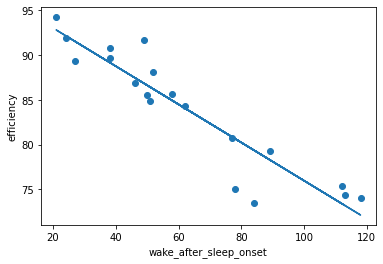

In [14]:
scatter_with_best_fit('wake_after_sleep_onset', 'efficiency')

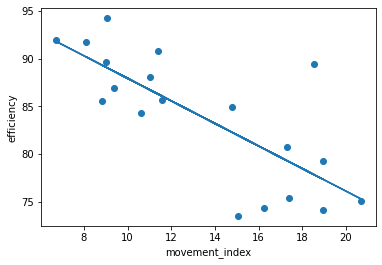

In [15]:
scatter_with_best_fit('movement_index', 'efficiency')

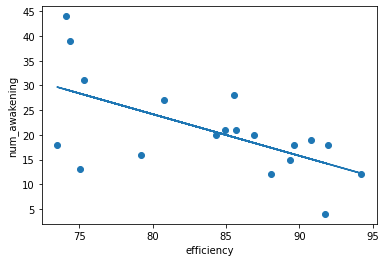

In [18]:
scatter_with_best_fit('efficiency', 'num_awakening')

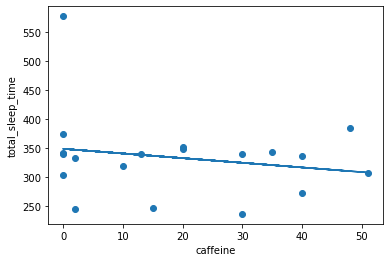

In [16]:
scatter_with_best_fit('caffeine', 'total_sleep_time')

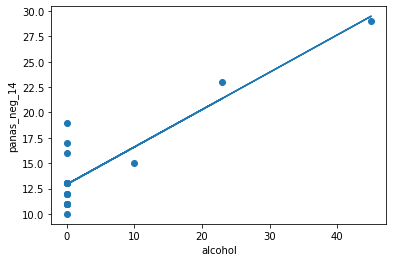

In [17]:
scatter_with_best_fit('alcohol', 'panas_neg_14')

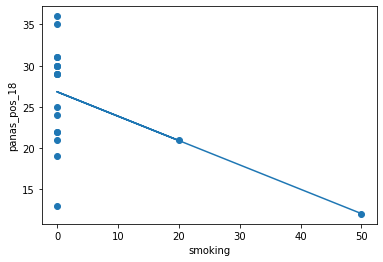

In [19]:
scatter_with_best_fit('smoking', 'panas_pos_18')